In [139]:
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import networkx as nx
import pandas as pd
import itertools

In [140]:
seq_df = pd.read_csv("data/data-sequences.csv")
dataset_df = pd.read_csv("data/dataset.csv")
pfam_df = pd.read_csv("data/pfam-descriptions.csv")

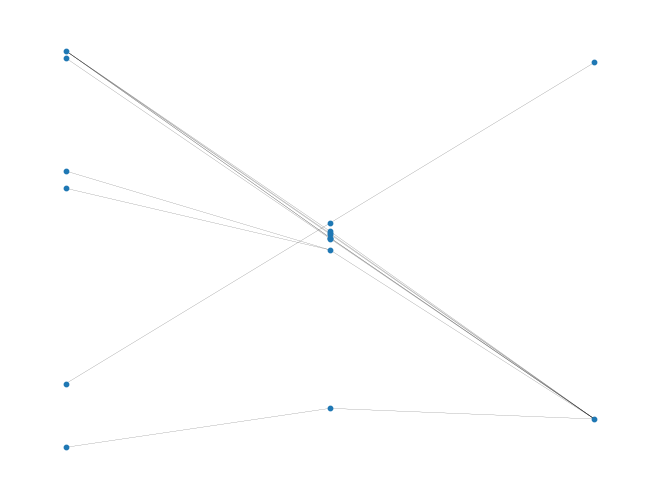

In [138]:
# Group by protein_id, and count the number of unique organism_taxa_id and domain_id.
# limit dataset_df to 200 rows for testing
dataset_df = dataset_df.head(10)

# only use the required columns
dataset_df = dataset_df[['protein_id', 'organism_taxa_id', 'domain_id']]

# drop duplicates
dataset_df = dataset_df.drop_duplicates()

# Group by protein_id, and count the number of unique organism_taxa_id and domain_id.
# Group by protein_id, and count the number of unique organism_taxa_id and domain_id.
protein_organism_counts = dataset_df.groupby('protein_id')['organism_taxa_id'].nunique()
protein_domain_counts = dataset_df.groupby('protein_id')['domain_id'].nunique()

# Create a new directed graph.
G = nx.DiGraph()

# Add nodes with node types for proteins, organisms and domains to distinguish them
for protein_id in dataset_df["protein_id"].unique():
    G.add_node(protein_id, node_type="protein")

for org_id in dataset_df["organism_taxa_id"].unique():
    G.add_node(org_id, node_type="organism")

for dom_id in dataset_df["domain_id"].unique():
    G.add_node(dom_id, node_type="domain")

# Add edges between proteins and organisms, and proteins and domains.
protein_organism_edges = list(zip(dataset_df['protein_id'], dataset_df['organism_taxa_id']))
protein_domain_edges = list(zip(dataset_df['protein_id'], dataset_df['domain_id']))
edges = list(itertools.chain(protein_organism_edges, protein_domain_edges))
G.add_edges_from(edges)

# Draw the graph with different y values for each type of node to align them vertically
pos = nx.spring_layout(G)
node_colors = ["red" if data["node_type"] == "protein" else "blue" if data["node_type"] == "organism" else "green" for node, data in G.nodes(data=True)]
for node, data in G.nodes(data=True):
    if data["node_type"] == "protein":
        pos[node][0] = 0.5
    elif data["node_type"] == "organism":
        pos[node][0] = 1.0
    elif data["node_type"] == "domain":
        pos[node][0] = 0.0
        

nx.draw(G, pos, with_labels=False, node_size=10, width=0.1, arrows=False)
plt.show()

In [77]:
# group by protein_id and count the number of unique organis_taxa_id
# print the number of proteins with more than one organism

In [13]:
# --------------------------------------------------
# data sequences columns: ['protein_id', 'protein_sequence']
# --------------------------------------------------
# dataset columns: ['protein_id', 'organism_taxa_id', 'organism_clade_identifier', 'genus_species', 'domain_description', 'domain_id', 'domain_start_coordinate', 'domain_end_coordinate', 'length_of_protein']
# --------------------------------------------------
# pfam descriptions columns: ['domain_id', 'domain_description']
# --------------------------------------------------

In [141]:
organism_df = dataset_df[['organism_taxa_id', 'organism_clade_identifier', 'genus_species']].drop_duplicates()
print('number of unique organisms: ', organism_df['organism_taxa_id'].nunique())
print('total number of organisms: ', organism_df.shape[0])
print('-' * 50)
print('unique values for each column: ')
print(organism_df.nunique())

number of unique organisms:  1995
total number of organisms:  1995
--------------------------------------------------
unique values for each column: 
organism_taxa_id             1995
organism_clade_identifier       1
genus_species                1995
dtype: int64


In [142]:
protein_df = dataset_df[['protein_id', 'length_of_protein']].drop_duplicates()
protein_df = protein_df.merge(seq_df, on='protein_id', how='left')
protein_df = protein_df.drop_duplicates()
print('length of protein_df: ', protein_df.shape[0])
print('number of unique proteins: ', protein_df['protein_id'].nunique())
# print columns
print('protein_df columns: ', list(protein_df.columns))

length of protein_df:  9988
number of unique proteins:  9988
protein_df columns:  ['protein_id', 'length_of_protein', 'protein_sequence']


In [81]:
domain_df = dataset_df[['domain_id', 'domain_description', 'domain_start_coordinate', 'domain_end_coordinate', 'protein_id']]
domain_df = domain_df.merge(pfam_df, left_on='domain_id', right_on='domain_id', how='left')
domain_df = domain_df.drop_duplicates()
# print the length of the domain_df
print('length of domain_df: ', domain_df.shape[0])
# print the number of unique domains
print('number of unique domains: ', domain_df['domain_id'].nunique())
# print the length of the pfa_df
# print the domain_id that occurs the most often value_counts()
print(domain_df[domain_df['domain_id'] == 'PF00400'].shape[0])
# print the number of unique protein_ids for domain_id='PF00400'
print('number of unique protein_ids for domain_id=PF00400: ', domain_df[domain_df['domain_id'] == 'PF00400']['protein_id'].nunique())

number of unique protein_ids for domain_id=PF00400:  129
length of domain_df:  10000
number of unique domains:  2453
130
number of unique protein_ids for domain_id=PF00400:  129


In [14]:
# loop through each colummn and prin the number of unique values
# print number of rows

print(f"Number of rows in data sequences: {len(dataset_df)}")

for col in dataset_df.columns:
    print(f"{col}: {len(dataset_df[col].unique())}")

Number of rows in data sequences: 10000
protein_id: 9988
organism_taxa_id: 1995
organism_clade_identifier: 1
genus_species: 1995
domain_description: 2800
domain_id: 2453
domain_start_coordinate: 1534
domain_end_coordinate: 1632
length_of_protein: 2266


GET  http://127.0.0.1:8000/api/pfam/[PFAM ID] - return the domain and it's description
http://127.0.0.1:8000/api/pfam/PF00360 returns
{
    "domain_id": "PF00360",
    "domain_description": "Phytochromeregion"
}


GET  http://127.0.0.1:8000/api/proteins/[TAXA ID] - return a list of all proteins for a given organism
NOTE: "id" here is sequential the primary key value generated by django for the table that holds the domain data
http://127.0.0.1:8000/api/proteins/55661 returns
[
    {
        "id": 88766,
        "protein_id": "A0A091FY39"
    },
    {
        "id": 88761,
        "protein_id": "A0A091FMY9"
    },
    ...
]

GET  http://127.0.0.1:8000/api/pfams/[TAXA ID] - return a list of all domains in all the proteins for a given organism.
NOTE: "id" here is sequential the primary key value generated by django for the table that holds the domain data
http://127.0.0.1:8000/api/pfams/55661 returns
[
    {
        "id": 88896,
        "pfam_id": {
            "domain_id": "mobidb-lite",
            "domain_description": "disorder prediction"
        }
    },
    {
        "id": 88891,
        "pfam_id": {
            "domain_id": "PF00307",
            "domain_description": "Calponinhomology(CH)domain"
        }
    },
    {
        "id": 88892,
        "pfam_id": {
            "domain_id": "PF00415",
            "domain_description": "Regulatorofchromosomecondensation(RCC1)repeat"
        }
    },
    {
        "id": 88893,
        "pfam_id": {
            "domain_id": "PF07648",
            "domain_description": "Kazal-typeserineproteaseinhibitordomain"
        }
    },
    {
        "id": 88894,
        "pfam_id": {
            "domain_id": "PF16172",
            "domain_description": "DOCKN-terminus"
        }
    },
    {
        "id": 88895,
        "pfam_id": {
            "domain_id": "mobidb-lite",
            "domain_description": "disorder prediction"
        }
    },
    {
        "id": 88897,
        "pfam_id": {
            "domain_id": "mobidb-lite",
            "domain_description": "disorder prediction"
        }
    },
    {
        "id": 88898,
        "pfam_id": {
            "domain_id": "mobidb-lite",
            "domain_description": "disorder prediction"
        }
    },
    {
        "id": 88899,
        "pfam_id": {
            "domain_id": "mobidb-lite",
            "domain_description": "disorder prediction"
        }
    },
    {
        "id": 88900,
        "pfam_id": {
            "domain_id": "PF00041",
            "domain_description": "FibronectintypeIIIdomain"
        }
    },
    {
        "id": 88901,
        "pfam_id": {
            "domain_id": "PF02141",
            "domain_description": "DENN(AEX-3)domain"
        }
    },
    {
        "id": 88902,
        "pfam_id": {
            "domain_id": "PF14260",
            "domain_description": "C4-typezinc-fingerofDNApolymerasedelta"
        }
    }
]

GET  http://127.0.0.1:8000/api/coverage/[PROTEIN ID] - return the domain coverage for a given protein. That is Sum of the protein domain lengths (start-stop)/length of protein.
http://127.0.0.1:8000/api/coverage/A0A016S8J7 returns
coverage:	0.693069306930693